<a href="https://colab.research.google.com/github/abhishek0981/ML-Projects/blob/main/News_popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the packages
import numpy as np
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn import linear_model, metrics
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image


In [ ]:
#Loading the datasets
train= pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")
print(train.shape)
print(test.shape)
print(sample.shape)

(29733, 61)
(9911, 60)
(9911, 2)


In [ ]:
#Checking the description
for i in data_dict.iterrows():
    print(i[1]['column'],':',i[1]['description'])

url : URL of the article (non-predictive)
timedelta : Days between the article publication and the dataset acquisition (non-predictive)
ntokenstitle : Number of words in the title
ntokenscontent : Number of words in the content
nuniquetokens : Rate of unique words in the content
nnonstop_words : Rate of non-stop words in the content
nnonstopuniquetokens : Rate of unique non-stop words in the content
num_hrefs : Number of links
numselfhrefs : Number of links to other articles published by Mashable
num_imgs : Number of images
num_videos : Number of videos
averagetokenlength : Average length of the words in the content
numkeywords : Number of keywords in the metadata
datachannelislifestyle : Is data channel 'Lifestyle'?
datachannelis_entertainment : Is data channel 'Entertainment'?
datachannelis_bus : Is data channel 'Business'?
datachannelis_socmed : Is data channel 'Social Media'?
datachannelis_tech : Is data channel 'Tech'?
datachannelis_world : Is data channel 'World'?
kwminmin : Wors

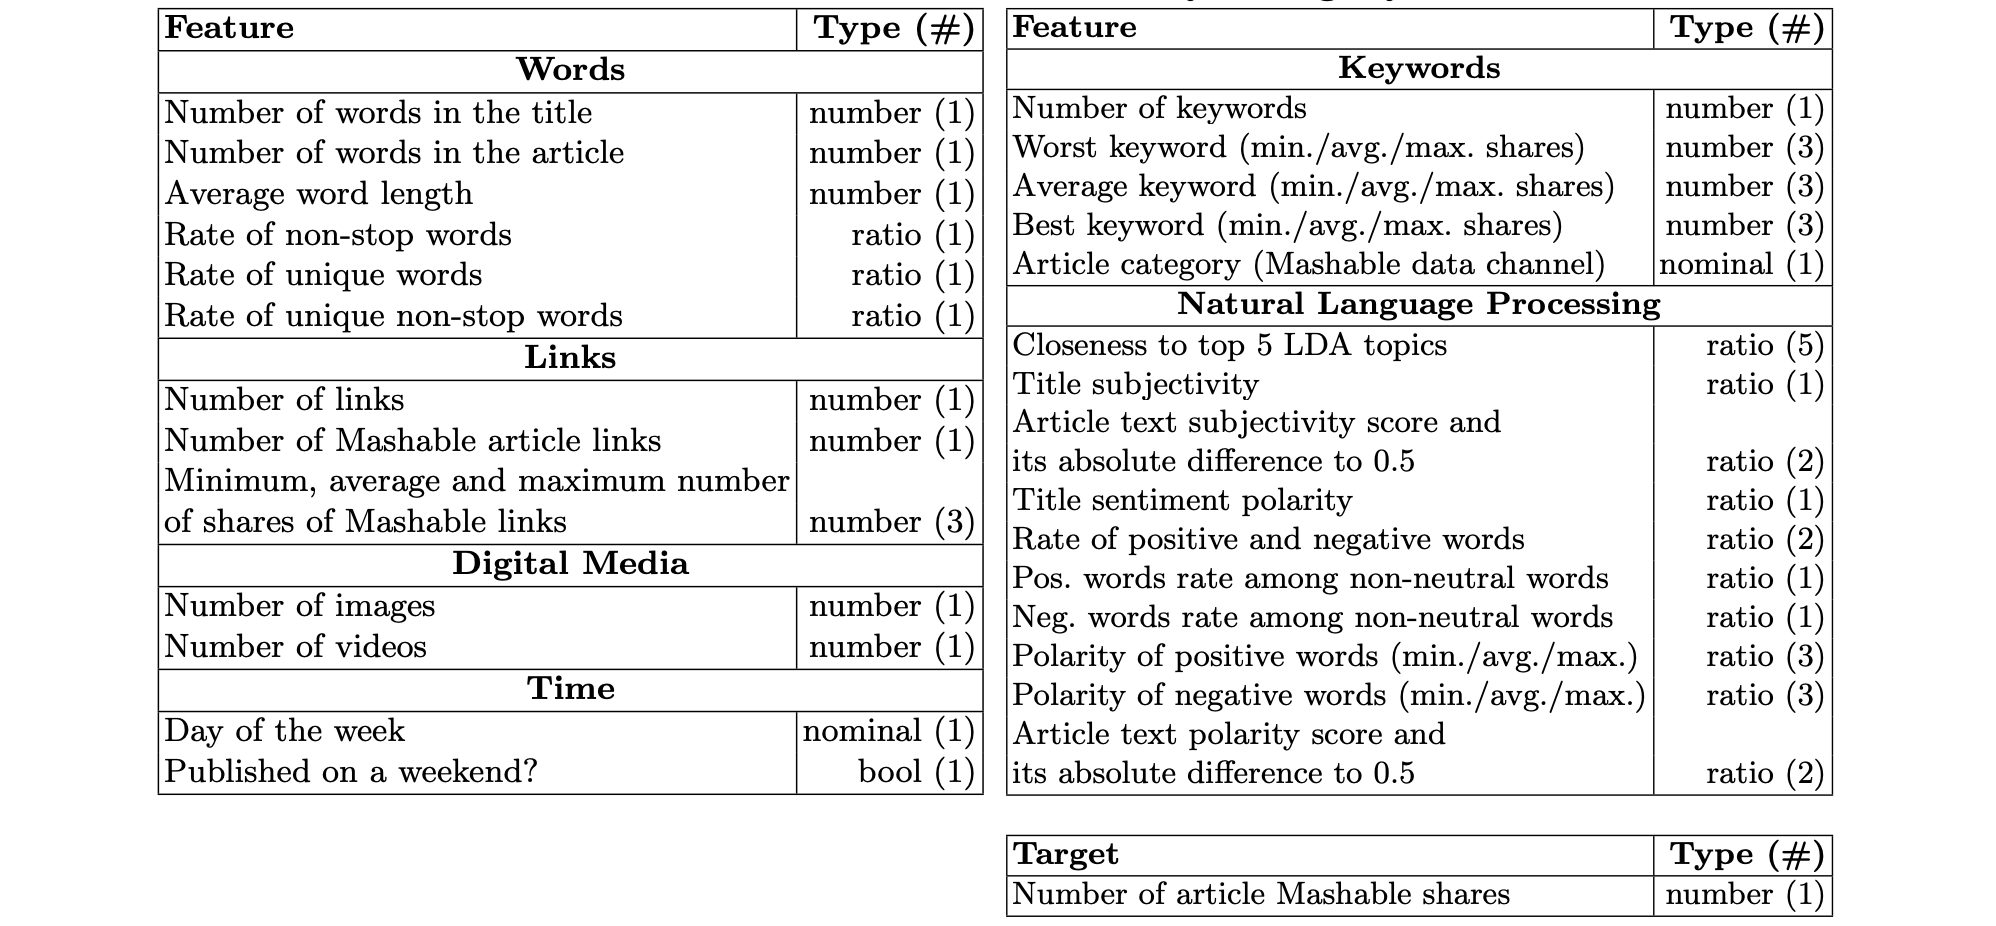

In [ ]:
Image(filename="features.png")

In [ ]:

train.head()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,http://mashable.com/2013/03/15/build-arduino-p...,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,0.0,4.606635,8.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2300.0,797.714286,0.0,617900.0,115912.500000,0.000000,5103.042553,2568.648709,2000.0,2000.0,2000.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.6,-0.100000,NaN,-0.100000,1.000000,0.600000,0.500000,0.600000,36700
1,1,http://mashable.com/2013/09/04/edible-bar-codes/,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,16.0,5.004808,7.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,768.0,259.400000,0.0,NaN,169071.428571,0.000000,3339.790199,2112.665837,658.0,13700.0,4477.25,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.148915,0.038462,NaN,0.800000,0.200000,0.324716,0.033333,1.0,-0.228621,-0.5000,-0.071429,0.000000,0.000000,0.500000,0.000000,24200
2,2,http://mashable.com/2014/06/20/non-player-char...,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,1.0,4.829694,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,472.625000,4800.0,843300.0,204837.500000,1575.400000,3562.101631,2589.125480,4800.0,NaN,4800.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.116600,0.034934,0.021834,NaN,0.384615,0.354545,0.050000,1.0,-0.260833,-0.5000,-0.166667,0.000000,0.000000,0.500000,0.000000,945
3,3,http://mashable.com/2014/08/06/food-art-vine-c...,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,1.0,4.634249,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,447.0,150.400000,0.0,843300.0,229728.571429,0.000000,3504.933802,NaN,0.0,0.0,0.00,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.7,-0.167500,-0.2500,-0.100000,0.000000,0.000000,0.500000,0.000000,844
4,4,http://mashable.com/2014/12/17/blackberry-clas...,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,0.0,4.678213,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1200.0,299.250000,33100.0,843300.0,381925.000000,2822.635182,5418.750000,3668.285640,1400.0,2300.0,2000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.0,-0.193182,-0.3125,-0.100000,0.383333,0.166667,0.116667,0.166667,551


In [ ]:
#Details of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             29733 non-null  int64  
 1   url                            29733 non-null  object 
 2   n_tokens_title                 29733 non-null  float64
 3   n_tokens_content               29733 non-null  float64
 4   n_unique_tokens                29733 non-null  float64
 5   n_non_stop_words               29733 non-null  float64
 6   n_non_stop_unique_tokens       29733 non-null  float64
 7   num_hrefs                      28921 non-null  float64
 8   num_self_hrefs                 25200 non-null  float64
 9   num_imgs                       24326 non-null  float64
 10  num_videos                     29146 non-null  float64
 11  average_token_length           29733 non-null  float64
 12  num_keywords                   29269 non-null 

In [ ]:
#checking the missing values
miss=round(100 *(train.isnull().sum()/len(train.index)),2)
miss

id                                0.00
url                               0.00
n_tokens_title                    0.00
n_tokens_content                  0.00
n_unique_tokens                   0.00
n_non_stop_words                  0.00
n_non_stop_unique_tokens          0.00
num_hrefs                         2.73
num_self_hrefs                   15.25
num_imgs                         18.19
num_videos                        1.97
average_token_length              0.00
num_keywords                      1.56
data_channel_is_lifestyle         0.00
data_channel_is_entertainment     0.00
data_channel_is_bus               0.00
data_channel_is_socmed            0.00
data_channel_is_tech              0.00
data_channel_is_world             0.00
kw_min_min                        3.65
kw_max_min                        1.53
kw_avg_min                        0.28
kw_min_max                        0.46
kw_max_max                        5.10
kw_avg_max                        0.39
kw_min_avg               

In [ ]:
#checking null value in descending order
data.isnull().sum().sort_values(ascending=False)

num_imgs                         5407
num_self_hrefs                   4533
global_subjectivity              2246
is_weekend                       2168
self_reference_max_shares        1762
weekday_is_wednesday             1554
kw_max_max                       1515
weekday_is_sunday                1496
abs_title_sentiment_polarity     1457
avg_positive_polarity            1238
kw_min_min                       1084
weekday_is_monday                 981
kw_avg_avg                        973
global_rate_negative_words        888
weekday_is_friday                 866
global_rate_positive_words        835
num_hrefs                         812
abs_title_subjectivity            799
min_negative_polarity             782
weekday_is_tuesday                753
max_negative_polarity             712
kw_max_avg                        681
rate_negative_words               593
num_videos                        587
rate_positive_words               587
num_keywords                      464
kw_max_min  

#  Data Cleaning

In [ ]:
#Checking datatype
train.info(verbose=1,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             29733 non-null  int64  
 1   url                            29733 non-null  object 
 2   n_tokens_title                 29733 non-null  float64
 3   n_tokens_content               29733 non-null  float64
 4   n_unique_tokens                29733 non-null  float64
 5   n_non_stop_words               29733 non-null  float64
 6   n_non_stop_unique_tokens       29733 non-null  float64
 7   num_hrefs                      28921 non-null  float64
 8   num_self_hrefs                 25200 non-null  float64
 9   num_imgs                       24326 non-null  float64
 10  num_videos                     29146 non-null  float64
 11  average_token_length           29733 non-null  float64
 12  num_keywords                   29269 non-null 

In [ ]:
# checking the shape of the data again
train.shape

(29733, 61)

In [ ]:
# Checking if there are columns with one unique value
train.nunique(dropna=True)

id                               29733
url                              29733
n_tokens_title                      20
n_tokens_content                  2250
n_unique_tokens                  21820
n_non_stop_words                  1404
n_non_stop_unique_tokens         18703
num_hrefs                          124
num_self_hrefs                      55
num_imgs                            86
num_videos                          52
average_token_length             23555
num_keywords                        10
data_channel_is_lifestyle            2
data_channel_is_entertainment        2
data_channel_is_bus                  2
data_channel_is_socmed               2
data_channel_is_tech                 2
data_channel_is_world                2
kw_min_min                          23
kw_max_min                        1038
kw_avg_min                       14367
kw_min_max                         957
kw_max_max                          30
kw_avg_max                       24057
kw_min_avg               

### We see that there are no unique value columns

In [ ]:
# imputing missing values
impute = miss[miss.gt(0)].index
impute

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [ ]:
# Imputing with KNN Imputer
imp= KNNImputer()
train[impute] = imp.fit_transform(train[impute])

In [ ]:
#Checking the missing values again
round(100 *(train.isnull().sum()/len(train.index)),2)


id                               0.0
url                              0.0
n_tokens_title                   0.0
n_tokens_content                 0.0
n_unique_tokens                  0.0
n_non_stop_words                 0.0
n_non_stop_unique_tokens         0.0
num_hrefs                        0.0
num_self_hrefs                   0.0
num_imgs                         0.0
num_videos                       0.0
average_token_length             0.0
num_keywords                     0.0
data_channel_is_lifestyle        0.0
data_channel_is_entertainment    0.0
data_channel_is_bus              0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
data_channel_is_world            0.0
kw_min_min                       0.0
kw_max_min                       0.0
kw_avg_min                       0.0
kw_min_max                       0.0
kw_max_max                       0.0
kw_avg_max                       0.0
kw_min_avg                       0.0
kw_max_avg                       0.0
k

### Now we can see that there are no NULL values

# Exploratory Data Analysis

### Target Exploration

Since the range of number of share is too large , we will perform log transform and then check the distribution

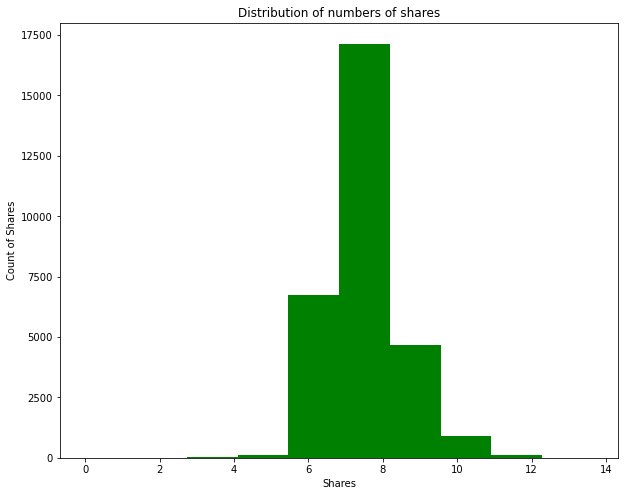

In [ ]:
# choose features and target
X = train.iloc[:,2:60] # select all columns except URL and TARGET
y = train["shares"].values.ravel() #target:number of shares
plt.figure(figsize= (10,8))
plt.hist(np.log(y),color="green")
plt.xlabel("Shares")
plt.ylabel("Count of Shares")
plt.title("Distribution of numbers of shares")
plt.show()


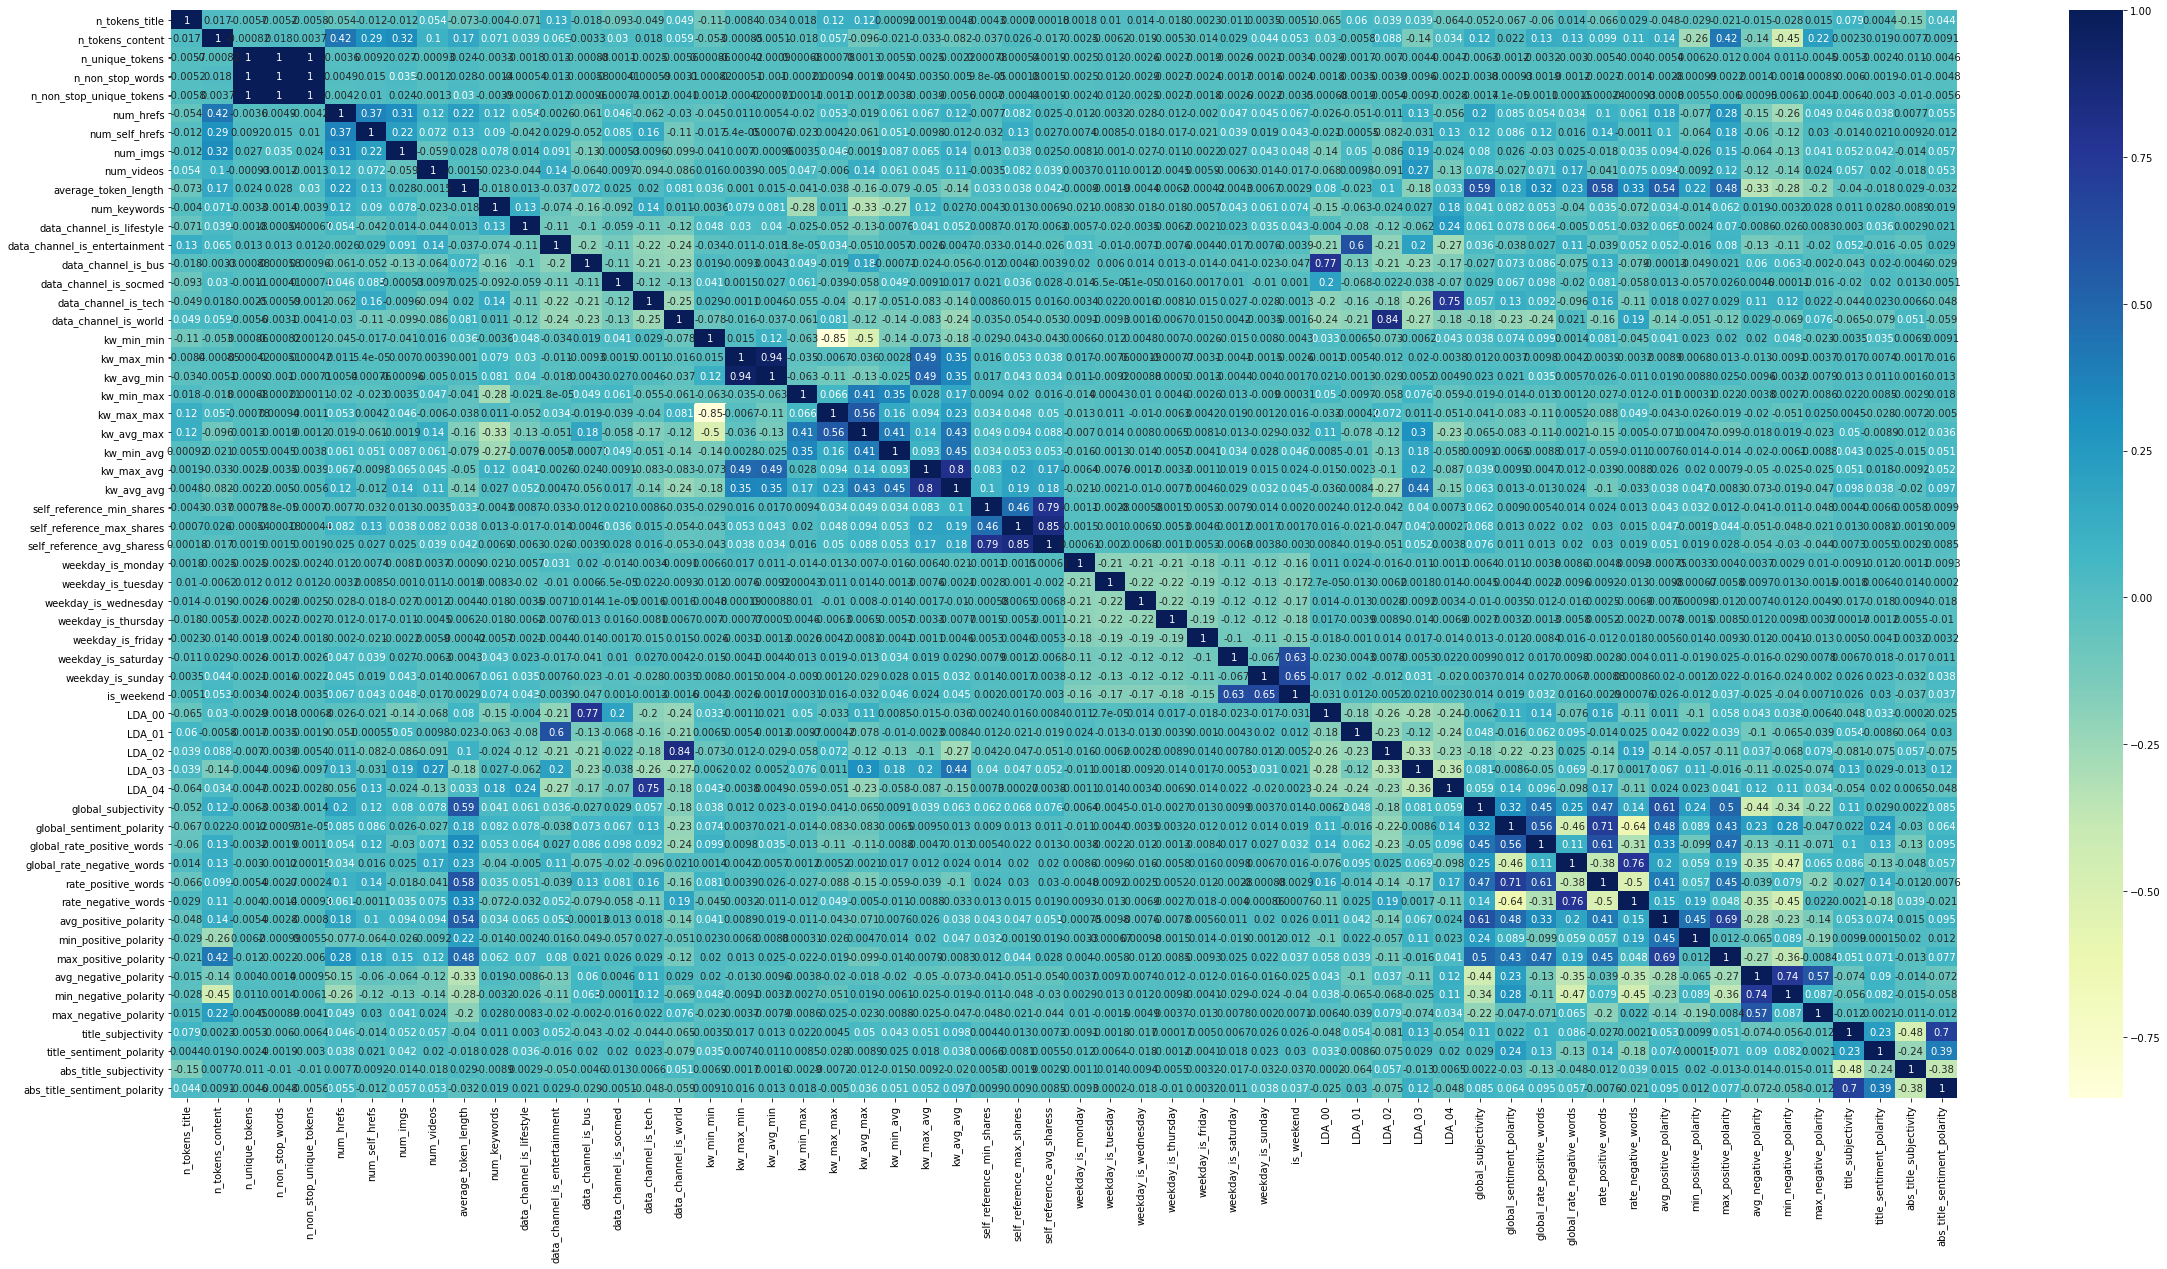

In [ ]:
# plotting the feature correlation heatmap
plt.figure(figsize=(40,20))
sns.heatmap(X.corr(),cmap="YlGnBu",annot=True)
plt.show()

From the correlation above, we can see that multicollinearity is less ,so no need to drop any columns

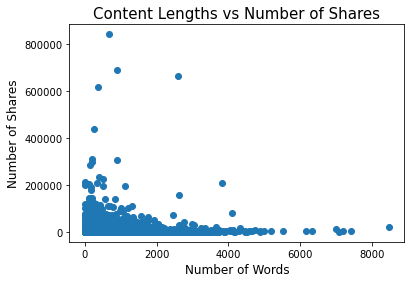

In [ ]:
# number of words in the content vs number of shares
plt.scatter(train["n_tokens_content"], train["shares"])
plt.title("Content Lengths vs Number of Shares", size=15)
plt.xlabel("Number of Words", size=12)
plt.ylabel("Number of Shares", size=12)
plt.show()

When number of words is more, number of shares is more

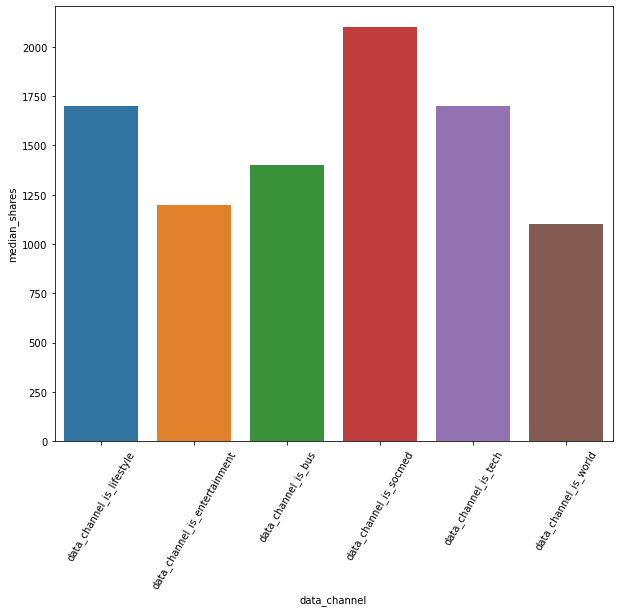

In [ ]:
plt.figure(figsize= (10,8))
channel = []
cols = ['data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']
for d in cols:
    channel.append(train[train[d]==1]['shares'].median())

ax = sns.barplot(x = cols, y = channel)
ax.set(xlabel = 'data_channel', ylabel = 'median_shares')
plt.xticks(rotation = 60)
plt.show()

When the DATA CHANNEL is SOCIAL MEDIA , there are maximum number of shares

## Treating Outliers


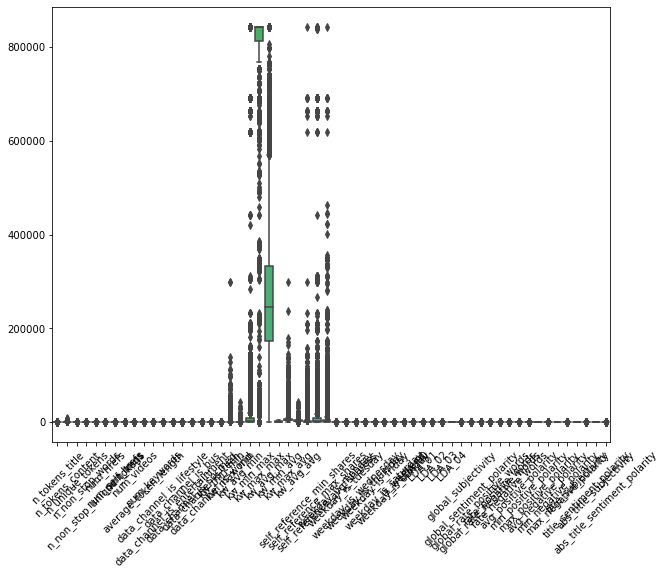

In [ ]:
#checking for outliers
plt.figure(figsize=(10,8))
plt.xticks(rotation =45)
sns.boxplot(data = X)
plt.show()

In [ ]:
# Finding negative value columns.
n=X.columns[(X<=0).any()]
n

Index(['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
      

In [ ]:
#converting negative values to positive values .

for i in n:
    m=X[i].min()
    name=i
    print(name)
    X[name]=((X[i]+1)-m)

n_tokens_content
n_unique_tokens
n_non_stop_words
n_non_stop_unique_tokens
num_hrefs
num_self_hrefs
num_imgs
num_videos
average_token_length
data_channel_is_lifestyle
data_channel_is_entertainment
data_channel_is_bus
data_channel_is_socmed
data_channel_is_tech
data_channel_is_world
kw_min_min
kw_max_min
kw_avg_min
kw_min_max
kw_max_max
kw_avg_max
kw_min_avg
kw_max_avg
kw_avg_avg
self_reference_min_shares
self_reference_max_shares
self_reference_avg_sharess
weekday_is_monday
weekday_is_tuesday
weekday_is_wednesday
weekday_is_thursday
weekday_is_friday
weekday_is_saturday
weekday_is_sunday
is_weekend
LDA_00
LDA_01
LDA_02
LDA_03
LDA_04
global_subjectivity
global_sentiment_polarity
global_rate_positive_words
global_rate_negative_words
rate_positive_words
rate_negative_words
avg_positive_polarity
min_positive_polarity
max_positive_polarity
avg_negative_polarity
min_negative_polarity
max_negative_polarity
title_subjectivity
title_sentiment_polarity
abs_title_subjectivity
abs_title_sentiment_

In [ ]:
# Checking negative columns
n=X.columns[(X<=0).any()]
n

Index([], dtype='object')

In [ ]:
# log transform with constant 10000 for real numbers
X = np.log((10000 + X))

In [ ]:
# Treating Outlier
for col in X.columns:
    percentiles = X[col].quantile([0.01, 0.99]).values
    X[col][X[col] <= percentiles[0]] = percentiles[0]
    X[col][X[col] >= percentiles[1]] = percentiles[1]

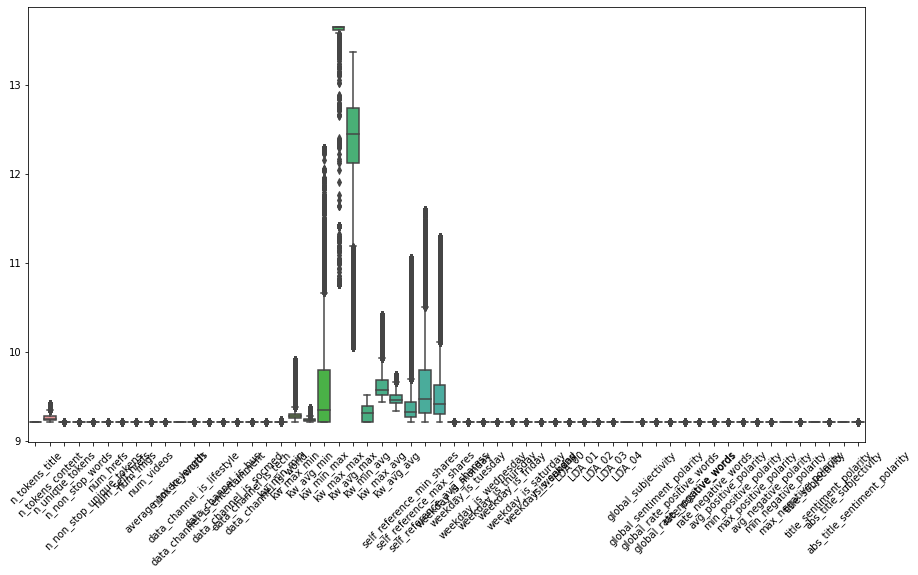

In [ ]:
#checking for outliers again
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X)
plt.show()


After capping also few columns are not showhing good results so dropping them

In [ ]:
cols = ['kw_min_min',
'kw_max_min',
'kw_avg_min',
'kw_min_max',
'kw_max_max',
'kw_avg_max',
'kw_min_avg',
'kw_max_avg',
'kw_avg_avg',
'data_channel_is_world',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'data_channel_is_tech',
 'data_channel_is_socmed',
'data_channel_is_lifestyle',
'data_channel_is_entertainment',
'data_channel_is_bus',
'data_channel_is_socmed',
'data_channel_is_tech',
'data_channel_is_world',
 'num_keywords',
'average_token_length',
'num_videos',
'num_hrefs',
'num_self_hrefs',
'num_imgs',
'num_videos',
'n_non_stop_unique_tokens',
 'n_non_stop_words',
 'n_unique_tokens',
 'n_tokens_content']
X = X.drop(cols, axis=1)

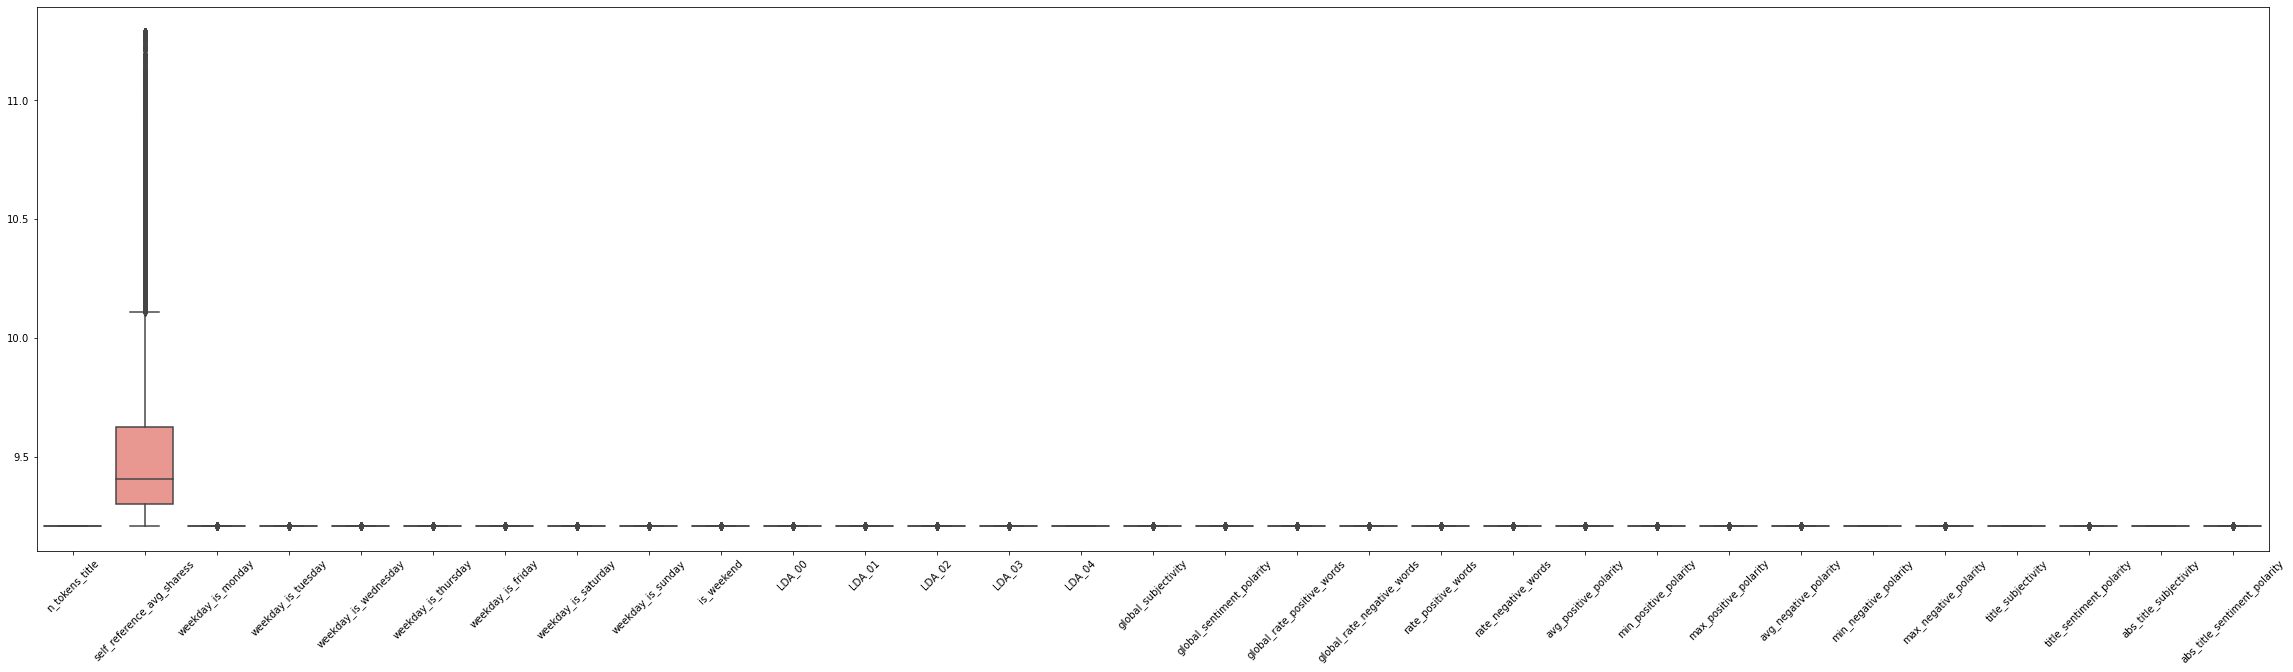

In [ ]:
#checking for outliers again
plt.figure(figsize=(40,10))
plt.xticks(rotation=45)
sns.boxplot(data = X)
plt.show()

### Bivariate analysis

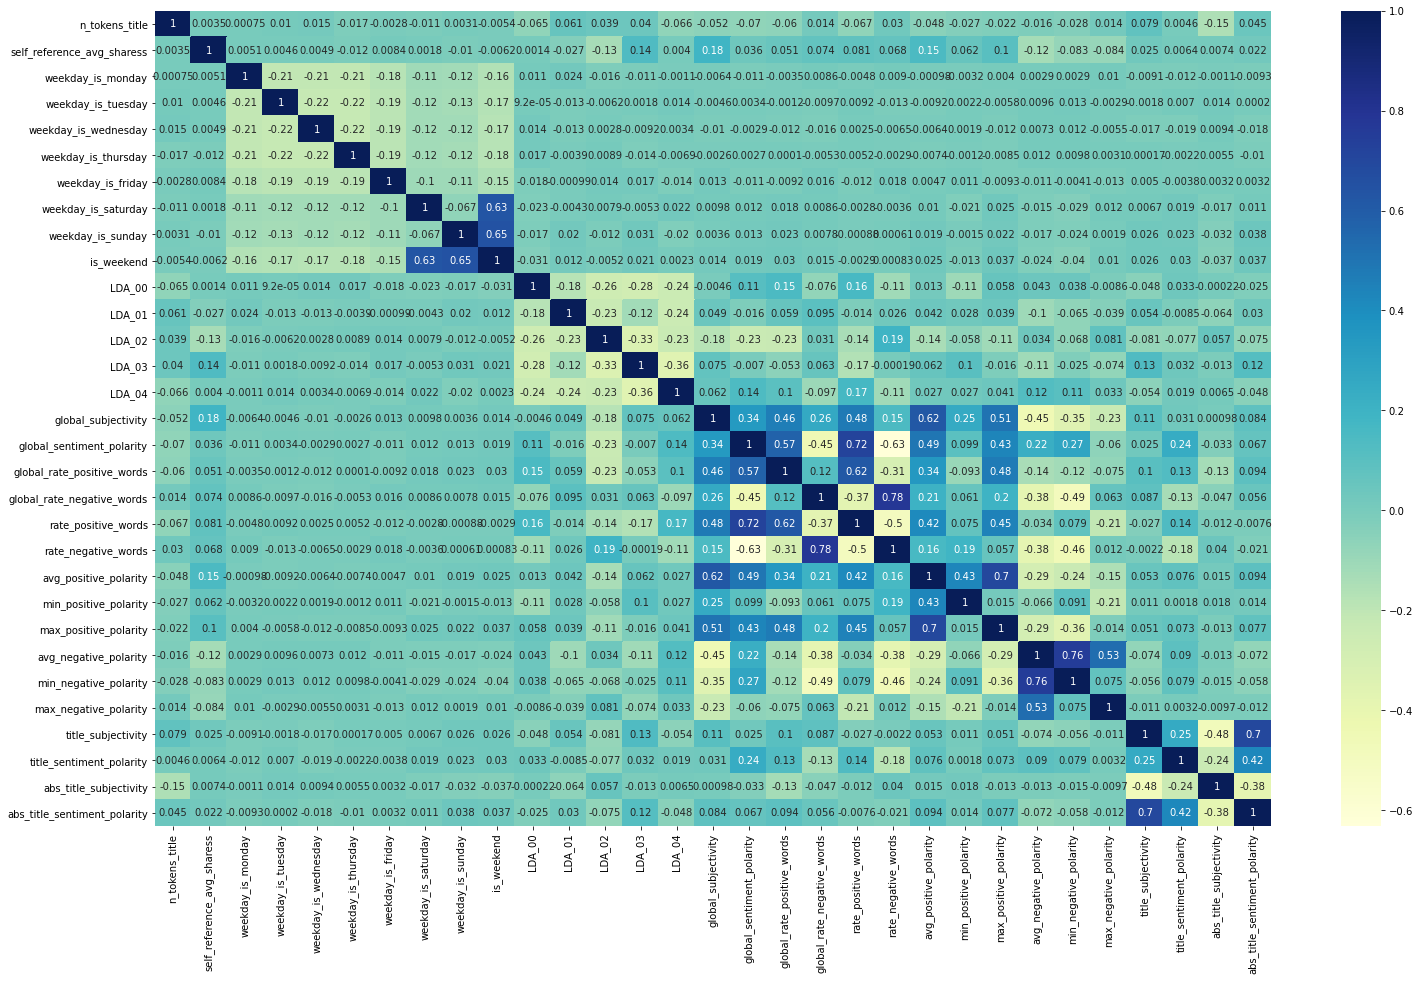

In [ ]:
# correlation table
plt.figure(figsize = (25,15))
sns.heatmap(X.corr(),cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
# Distribution for the target Variable
plt.figure(figsize=(8,8))
sns.histplot(y)
plt.show()


AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 576x576 with 0 Axes>

### Log Transform

All the features are almost positively skewed, we'll log transform the features to neutralize the positive skewness in the dataset.

In [ ]:
y = np.log(y)
sns.histplot(y)
#sns.histplot(np.log(y))
plt.show()

AttributeError: module 'seaborn' has no attribute 'histplot'

### Feature Scaling

In [ ]:
scaler = StandardScaler()

X[:] = scaler.fit_transform(X)

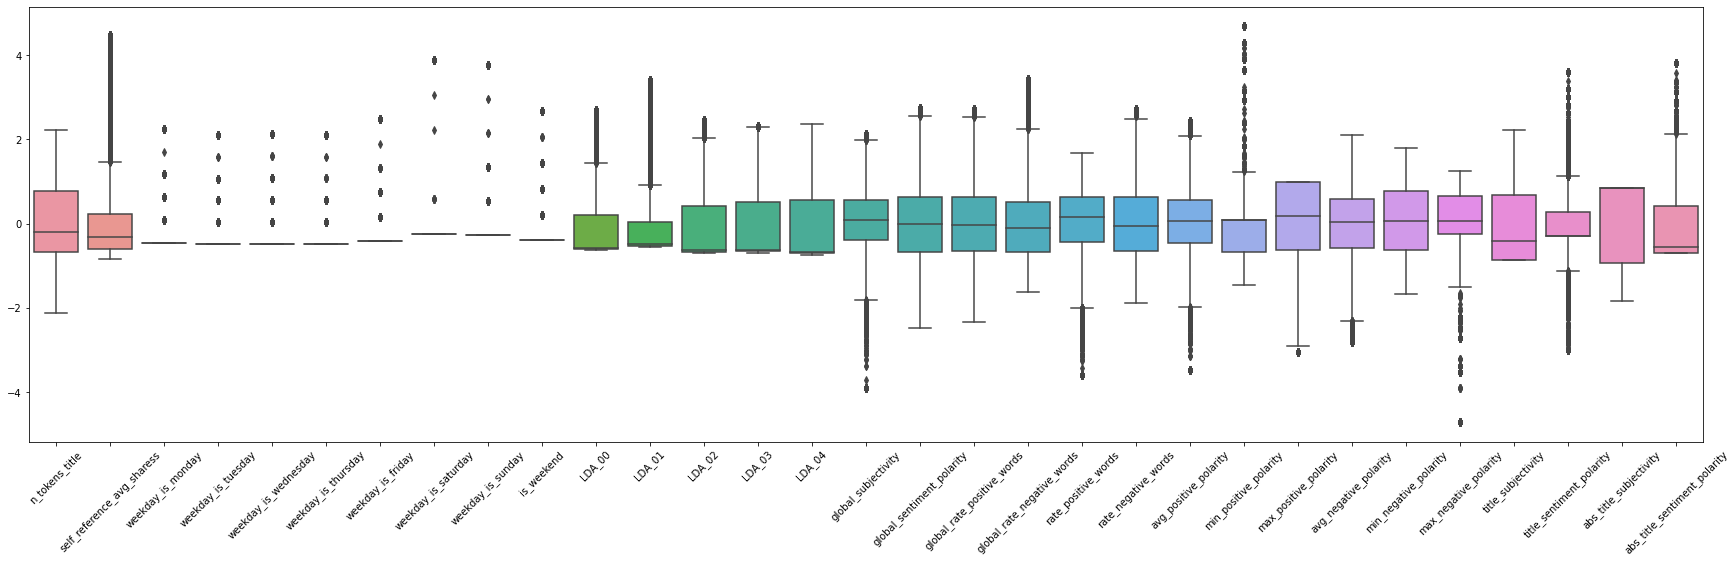

In [ ]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=45)
sns.boxplot(data = X)
plt.show()

# Model Building

### Split into train test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(20813, 31) (20813,)
(8920, 31) (8920,)


In [ ]:
X_train.head()

,n_tokens_title,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
4585,-0.675068,-0.115244,-0.45549,2.108308,-0.488803,-0.477739,-0.412907,-0.256976,-0.274296,-0.396648,0.650721,1.046511,-0.649318,-0.644852,-0.086993,0.622188,0.887921,-0.925817,-0.448185,-0.077608,0.304801,1.783300,-0.275458,0.987637,1.183876,1.374181,0.062473,-0.871169,-0.282089,0.843976,-0.701241
13413,-0.675068,-0.653674,-0.45549,-0.483729,0.034874,2.112734,-0.412907,-0.256976,-0.274296,-0.396648,1.725247,0.456562,-0.625773,-0.622273,-0.668857,-0.356614,0.411547,1.078664,-0.572521,0.856880,-0.861743,-0.202101,-0.940100,0.987637,0.064759,-1.660924,0.062473,-0.085960,-0.136814,-0.518955,-0.532046
9073,1.743040,3.042091,-0.45549,-0.483729,2.129477,-0.477739,-0.412907,-0.256976,-0.274296,-0.396648,-0.618202,0.350006,-0.688575,1.671128,-0.730387,0.732781,2.039879,0.425614,-1.616945,1.677393,-1.886042,0.670284,-0.173206,0.584661,2.101823,1.807746,1.254521,0.287328,1.848564,-1.166919,1.780216
28754,0.292320,0.062278,-0.45549,-0.483729,-0.488803,2.112734,-0.412907,-0.256976,-0.274296,-0.396648,1.182822,-0.482874,-0.649012,0.601100,-0.691818,-0.050066,0.219343,0.433227,-0.597314,0.720127,-0.691028,-0.376528,-0.940100,-0.019810,0.033709,-0.065293,0.658498,0.533064,0.246183,-1.593482,-0.085991
21620,0.292320,-0.316421,-0.45549,-0.483729,-0.488803,-0.477739,-0.412907,-0.256976,3.777591,2.668192,-0.124296,-0.510149,0.510129,0.693519,-0.708348,-0.962992,0.336062,-0.742272,-1.176694,0.925257,-0.947101,0.962224,0.082425,0.987637,-2.818608,-0.793724,-4.705837,-0.871169,-0.282089,0.843976,-0.701241


We wil choose 15 components here

## Feature Engineering and Selection

Let's Understand the feature importance for raw features as well as components to decide top features for modelling.

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

rfe = RFE(lr, 15)             #selected top 15 features
rfe = rfe.fit(X_train, Y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('n_tokens_title', False, 10),
 ('self_reference_avg_sharess', True, 1),
 ('weekday_is_monday', False, 15),
 ('weekday_is_tuesday', False, 7),
 ('weekday_is_wednesday', False, 6),
 ('weekday_is_thursday', False, 8),
 ('weekday_is_friday', True, 1),
 ('weekday_is_saturday', True, 1),
 ('weekday_is_sunday', True, 1),
 ('is_weekend', True, 1),
 ('LDA_00', True, 1),
 ('LDA_01', True, 1),
 ('LDA_02', True, 1),
 ('LDA_03', True, 1),
 ('LDA_04', True, 1),
 ('global_subjectivity', True, 1),
 ('global_sentiment_polarity', False, 12),
 ('global_rate_positive_words', False, 16),
 ('global_rate_negative_words', False, 5),
 ('rate_positive_words', True, 1),
 ('rate_negative_words', True, 1),
 ('avg_positive_polarity', False, 13),
 ('min_positive_polarity', False, 3),
 ('max_positive_polarity', False, 14),
 ('avg_negative_polarity', False, 11),
 ('min_negative_polarity', False, 4),
 ('max_negative_polarity', False, 17),
 ('title_subjectivity', True, 1),
 ('title_sentiment_polarity', True, 1),
 ('ab

In [ ]:
#The columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['self_reference_avg_sharess', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'rate_positive_words', 'rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity'],
      dtype='object')

In [ ]:
# will pass the above columns to X train and create a new dataframe
X_train_rfe = X_train[col]
X_train_rfe.head()

,self_reference_avg_sharess,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,rate_positive_words,rate_negative_words,title_subjectivity,title_sentiment_polarity
4585,-0.115244,-0.412907,-0.256976,-0.274296,-0.396648,0.650721,1.046511,-0.649318,-0.644852,-0.086993,0.622188,-0.077608,0.304801,-0.871169,-0.282089
13413,-0.653674,-0.412907,-0.256976,-0.274296,-0.396648,1.725247,0.456562,-0.625773,-0.622273,-0.668857,-0.356614,0.856880,-0.861743,-0.085960,-0.136814
9073,3.042091,-0.412907,-0.256976,-0.274296,-0.396648,-0.618202,0.350006,-0.688575,1.671128,-0.730387,0.732781,1.677393,-1.886042,0.287328,1.848564
28754,0.062278,-0.412907,-0.256976,-0.274296,-0.396648,1.182822,-0.482874,-0.649012,0.601100,-0.691818,-0.050066,0.720127,-0.691028,0.533064,0.246183
21620,-0.316421,-0.412907,-0.256976,3.777591,2.668192,-0.124296,-0.510149,0.510129,0.693519,-0.708348,-0.962992,0.925257,-0.947101,-0.871169,-0.282089


In [ ]:
# will pass the above columns to X test and create a new df
X_test_rfe = X_test[col]
X_test_rfe.head()

,self_reference_avg_sharess,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,rate_positive_words,rate_negative_words,title_subjectivity,title_sentiment_polarity
17455,0.655933,-0.412907,-0.256976,-0.274296,-0.396648,1.104971,-0.490387,0.727584,-0.644323,-0.691919,0.909059,0.438575,-0.339557,1.497267,1.106077
25193,-0.264628,-0.412907,-0.256976,-0.274296,-0.396648,-0.550716,-0.459928,1.501511,-0.622251,0.015396,-0.433270,1.334028,-1.457393,-0.871169,-0.282089
13154,-0.597309,-0.412907,-0.256976,-0.274296,-0.396648,-0.576069,-0.490577,2.294149,-0.644867,-0.691924,-0.827648,-0.360678,0.327294,0.673484,-2.219149
6712,-0.836693,-0.412907,-0.256976,-0.274296,-0.396648,0.387167,-0.528802,-0.678652,-0.673103,1.399406,-1.068002,-1.247642,1.765323,1.188351,-2.993999
29548,0.695655,-0.412907,-0.256976,-0.274296,-0.396648,1.729316,0.449981,-0.625770,-0.621342,-0.668560,0.552658,-0.202968,0.461287,1.909151,-2.606572


In [ ]:
# Now applying PCA with the selected columns df
pca=PCA(random_state=42)
pca.fit_transform(X_train_rfe)

array([[-1.19591755e-01, -5.72085488e-01, -1.39270042e-01, ...,
         3.19735321e-01, -4.05031498e-03, -1.80634858e-03],
       [-9.10596538e-01, -8.32091385e-01, -6.66314617e-01, ...,
        -2.15824439e-01,  3.34330377e-03, -1.88318730e-03],
       [-2.68960291e+00, -8.10473140e-01,  2.53698178e+00, ...,
         3.98967644e-02, -1.12546887e-03, -6.68772982e-04],
       ...,
       [-1.74744581e+00, -4.13281709e-01, -7.67046248e-01, ...,
         1.96736801e-02, -4.29853665e-01,  4.00385214e-04],
       [ 3.19598027e+00,  3.76179193e-01, -3.87683507e-01, ...,
        -4.63603522e-01, -3.70490128e-03,  9.55392369e-05],
       [ 3.30119595e+00,  2.56020612e-01, -5.44260814e-01, ...,
         2.01628262e-01, -4.77231229e-03, -5.53362658e-04]])

In [ ]:
# let's see the two components of PCA
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':X_train_rfe.columns})
components

,PC1,PC2,Feature
0,-0.134066,-0.034716,self_reference_avg_sharess
1,0.069260,-0.203066,weekday_is_friday
2,-0.118215,0.457657,weekday_is_saturday
3,-0.104047,0.464458,weekday_is_sunday
4,-0.164524,0.675712,is_weekend
5,-0.192993,-0.109747,LDA_00
6,0.006253,0.035055,LDA_01
7,0.370130,0.061476,LDA_02
8,0.041242,0.086616,LDA_03
9,-0.233442,-0.075053,LDA_04


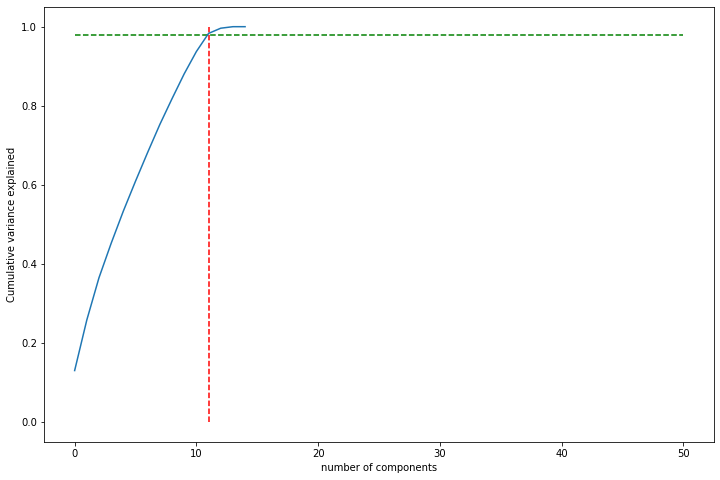

In [ ]:
#Screeplot for the PCA components
fig = plt.figure(figsize=[12,8])
plt.vlines(x=11, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.98, xmax=50, xmin=0, colors="g", linestyles="--")
plt.plot( np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel("Cumulative variance explained")
plt.show()

In [ ]:
#creating a dataframe for PCA on selected RFE columns
colnames = list(X_train_rfe.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],'Feature':colnames})


In [ ]:
#creating a dataframe for PCA on selected RFE columns
colnames = list(X_test_rfe.columns)
pca_df1 = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],
                       'PC12':pca.components_[11],'PC13':pca.components_[12],
                       'PC14':pca.components_[13],'PC15':pca.components_[14],'Feature':colnames})


In [ ]:
#Creating a new df on 15 features for train data
X_train_pca = X_train_rfe[pca_df.Feature[:11]]
X_train_pca.head()

,self_reference_avg_sharess,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity
4585,-0.115244,-0.412907,-0.256976,-0.274296,-0.396648,0.650721,1.046511,-0.649318,-0.644852,-0.086993,0.622188
13413,-0.653674,-0.412907,-0.256976,-0.274296,-0.396648,1.725247,0.456562,-0.625773,-0.622273,-0.668857,-0.356614
9073,3.042091,-0.412907,-0.256976,-0.274296,-0.396648,-0.618202,0.350006,-0.688575,1.671128,-0.730387,0.732781
28754,0.062278,-0.412907,-0.256976,-0.274296,-0.396648,1.182822,-0.482874,-0.649012,0.601100,-0.691818,-0.050066
21620,-0.316421,-0.412907,-0.256976,3.777591,2.668192,-0.124296,-0.510149,0.510129,0.693519,-0.708348,-0.962992


In [ ]:
#Creating a new df on 15 features for train data
X_test_pca = X_test_rfe[pca_df1.Feature[:11]]
X_test_pca.head()

,self_reference_avg_sharess,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity
17455,0.655933,-0.412907,-0.256976,-0.274296,-0.396648,1.104971,-0.490387,0.727584,-0.644323,-0.691919,0.909059
25193,-0.264628,-0.412907,-0.256976,-0.274296,-0.396648,-0.550716,-0.459928,1.501511,-0.622251,0.015396,-0.433270
13154,-0.597309,-0.412907,-0.256976,-0.274296,-0.396648,-0.576069,-0.490577,2.294149,-0.644867,-0.691924,-0.827648
6712,-0.836693,-0.412907,-0.256976,-0.274296,-0.396648,0.387167,-0.528802,-0.678652,-0.673103,1.399406,-1.068002
29548,0.695655,-0.412907,-0.256976,-0.274296,-0.396648,1.729316,0.449981,-0.625770,-0.621342,-0.668560,0.552658


In [ ]:
# now doing final PCA with 11 components

pca_final = IncrementalPCA(n_components=11)
df_train_pca = pca_final.fit_transform(X_train_pca)
df_train_pca.shape

(20813, 11)

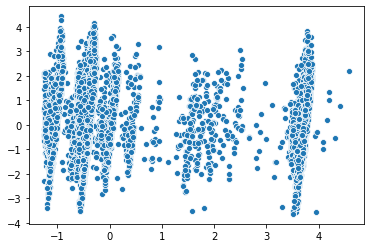

In [ ]:
#Plotting first 2 PCA components
sns.scatterplot(x=df_train_pca[:,0], y=df_train_pca[:,1])
plt.show()

Applying the transformation on the test set

In [ ]:
df_test_pca = pca_final.transform(X_test_pca)
df_test_pca.shape

(8920, 11)

# BASELINE MODELLING


## 1. LINEAR REGRESSION

In [ ]:
# created a function to get all the valuable metrics
def regression_results(y_true, y_pred):

    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
lm = LinearRegression()

# Fit a line
lm.fit(df_train_pca, Y_train)
# predict the testing pca data
train_predict = lm.predict(df_train_pca)
test_predict = lm.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(Y_test.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.0815
r2:  0.0815
MAE:  0.6737
MSE:  0.8074
RMSE:  0.8985

Test metrics
explained_variance:  0.0742
r2:  0.0739
MAE:  0.6605
MSE:  0.78
RMSE:  0.8832


# 2. Ridge Regression

In [ ]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(df_train_pca, Y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [ ]:
#Fitting Ridge model for alpha = 10 and printing coefficients
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(df_train_pca, Y_train)
print(ridge.coef_)

[ 0.07363433  0.15037611  0.08500764  0.00586493 -0.08663071 -0.01349107
  0.02280199  0.0341763  -0.08932369 -0.00920162 -0.88445968]


In [ ]:
# prediction
train_predict = ridge.predict(df_train_pca)
test_predict = ridge.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(Y_test.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.0815
r2:  0.0815
MAE:  0.6737
MSE:  0.8074
RMSE:  0.8985

Test metrics
explained_variance:  0.0742
r2:  0.0739
MAE:  0.6605
MSE:  0.78
RMSE:  0.8832


# 3. Lasso Regression

In [ ]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(df_train_pca, Y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [ ]:
#Fitting Lasso model for alpha = 50 and printing coefficients

alpha =0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(df_train_pca, Y_train)

Lasso(alpha=0.0001)

In [ ]:
lasso.coef_

array([ 0.07358203,  0.15031119,  0.08493288,  0.00578431, -0.08654191,
       -0.01339652,  0.0226979 ,  0.03407084, -0.08919878, -0.00746267,
       -0.07484629])

In [ ]:
# prediction
train_predict = lasso.predict(df_train_pca)
test_predict = lasso.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(Y_test.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.0814
r2:  0.0814
MAE:  0.6738
MSE:  0.8075
RMSE:  0.8986

Test metrics
explained_variance:  0.074
r2:  0.0738
MAE:  0.6606
MSE:  0.7802
RMSE:  0.8833


##  CREATING SUBMISSION FILE

In [ ]:
# checking the test data
test.head()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,29733,http://mashable.com/2014/12/05/2014-cant-unsee/,10.0,564.0,0.505618,1.0,0.637394,21.0,1.0,0.0,3.0,4.723404,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,442.0,128.000000,23700.0,843300.0,340780.000000,2154.061235,3702.951220,2994.958581,2300.0,2300.0,2300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.040069,0.839887,0.040038,0.040006,0.442277,0.053681,0.037234,0.019504,0.65625,0.343750,0.269218,0.062500,0.6,-0.263636,-0.700000,-0.10,1.0,0.0,0.5,0.0
1,29734,http://mashable.com/2014/01/02/twitter-new-yea...,12.0,1127.0,0.431298,1.0,0.621622,10.0,6.0,11.0,0.0,4.360248,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,733.0,254.875000,6300.0,843300.0,140325.000000,1671.078652,4040.166667,2704.175559,3500.0,6300.0,4900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.025053,0.025040,0.025003,0.025000,0.899904,0.425115,0.159958,0.042591,0.014197,0.75000,0.250000,0.420924,0.033333,1.0,-0.243341,-0.714286,NaN,0.0,0.0,0.5,0.0
2,29735,http://mashable.com/2014/06/11/gopro-value-3-b...,10.0,400.0,0.564232,1.0,0.698795,1.0,0.0,1.0,1.0,4.765000,7.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,784.0,283.285714,6800.0,843300.0,166071.428571,1828.500000,3575.518291,2645.535689,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028572,0.885666,0.028572,0.028620,0.028572,0.548466,0.011693,0.047500,0.032500,0.59375,0.406250,0.312286,0.136364,0.5,-0.354808,-0.800000,-0.15,0.0,0.0,0.5,0.0
3,29736,http://mashable.com/2014/10/08/spanish-ebola-d...,12.0,798.0,0.435279,1.0,0.613054,2.0,2.0,3.0,1.0,3.984962,9.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,796.0,284.222222,1800.0,843300.0,325322.222222,1059.333333,7735.494465,3966.507513,6300.0,6300.0,6300.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022223,0.495422,0.022223,0.437909,0.022223,0.537687,0.028463,0.047619,0.033835,NaN,0.415385,0.359650,0.136364,1.0,-0.362912,-1.000000,-0.05,0.0,0.0,0.5,0.0
4,29737,http://mashable.com/2014/02/09/jennifer-lawren...,11.0,1010.0,0.464503,1.0,0.611727,32.0,2.0,1.0,0.0,5.180198,8.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,269.0,91.714286,0.0,843300.0,214137.500000,0.000000,3583.632001,2030.692327,1500.0,NaN,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.025536,0.025047,0.899314,0.025101,0.025002,0.412513,0.104127,0.025743,0.013861,0.65000,0.350000,0.375991,0.100000,0.8,-0.264286,-0.500000,NaN,0.0,0.0,0.5,0.0


In [ ]:
sub = test.set_index('id')[X_train_pca.columns]
sub.shape

(9911, 11)

In [ ]:
missing=round(100 *(sub.isnull().sum()/len(sub.index)),2)
missing

self_reference_avg_sharess    1.03
weekday_is_friday             2.90
weekday_is_saturday           0.26
weekday_is_sunday             4.95
is_weekend                    7.09
LDA_00                        0.00
LDA_01                        0.00
LDA_02                        0.00
LDA_03                        0.00
LDA_04                        0.00
global_subjectivity           7.59
dtype: float64

In [ ]:
# imputing missing values
imput = missing[missing.gt(0)].index
imput

Index(['self_reference_avg_sharess', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'global_subjectivity'],
      dtype='object')

In [ ]:
# Imputed with KNN Imputer
imp1= KNNImputer()
sub[imput] = imp.fit_transform(sub[imput])

In [ ]:
#Checking the Null values again
round(100 *(sub.isnull().sum()/len(sub.index)),2)

self_reference_avg_sharess    0.0
weekday_is_friday             0.0
weekday_is_saturday           0.0
weekday_is_sunday             0.0
is_weekend                    0.0
LDA_00                        0.0
LDA_01                        0.0
LDA_02                        0.0
LDA_03                        0.0
LDA_04                        0.0
global_subjectivity           0.0
dtype: float64

In [ ]:
sub= pca_final.transform(sub)
sub.shape

(9911, 11)

In [ ]:
# We have chosen Ridge regression as it has the lowest RMSE
test["Shares"] = ridge.predict(sub)
prediction = test[['id','Shares']]
prediction.head()

,id,Shares
0,29733,360.045496
1,29734,759.251445
2,29735,7.121818
3,29736,974.173908
4,29737,237.331766


Finally, lets create a csv file out of this dataset, ensuring to set index=False to avoid an addition column in the csv.

In [ ]:
prediction.to_csv('submission.csv',index=False)